In [60]:
from nltk.corpus import *
from nltk.stem import *
from konlpy.tag import Kkma
from nltk.tokenize import *
from nltk.tag import *
import nltk
from keras.utils import to_categorical
import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf

text="Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.[27] Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including procedural, object-oriented, and functional programming. Python is often described as a 'batteries included' language due to its comprehensive standard library.[28]"
text=sent_tokenize(text)
text

['Python is an interpreted, high-level, general-purpose programming language.',
 "Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace.",
 'Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.',
 '[27] Python is dynamically typed and garbage-collected.',
 'It supports multiple programming paradigms, including procedural, object-oriented, and functional programming.',
 "Python is often described as a 'batteries included' language due to its comprehensive standard library.",
 '[28]']

In [11]:
voc = Counter()
sentences = []
stop_words = stopwords.words('english')
for i in text:
    sentence = word_tokenize(i)
    res = []
    for word in sentence: 
        word = word.lower()
        if word not in stop_words: 
            if len(word) > 2:
                res.append(word)
                voc[word]=voc[word]+1
    sentences.append(res) 
print(sentences)

[['python', 'interpreted', 'high-level', 'general-purpose', 'programming', 'language'], ['created', 'guido', 'van', 'rossum', 'first', 'released', '1991', 'python', 'design', 'philosophy', 'emphasizes', 'code', 'readability', 'notable', 'use', 'significant', 'whitespace'], ['language', 'constructs', 'object-oriented', 'approach', 'aim', 'help', 'programmers', 'write', 'clear', 'logical', 'code', 'small', 'large-scale', 'projects'], ['python', 'dynamically', 'typed', 'garbage-collected'], ['supports', 'multiple', 'programming', 'paradigms', 'including', 'procedural', 'object-oriented', 'functional', 'programming'], ['python', 'often', 'described', "'batteries", 'included', 'language', 'due', 'comprehensive', 'standard', 'library'], []]


In [12]:
voc

Counter({'python': 4,
         'interpreted': 1,
         'high-level': 1,
         'general-purpose': 1,
         'programming': 3,
         'language': 3,
         'created': 1,
         'guido': 1,
         'van': 1,
         'rossum': 1,
         'first': 1,
         'released': 1,
         '1991': 1,
         'design': 1,
         'philosophy': 1,
         'emphasizes': 1,
         'code': 2,
         'readability': 1,
         'notable': 1,
         'use': 1,
         'significant': 1,
         'whitespace': 1,
         'constructs': 1,
         'object-oriented': 2,
         'approach': 1,
         'aim': 1,
         'help': 1,
         'programmers': 1,
         'write': 1,
         'clear': 1,
         'logical': 1,
         'small': 1,
         'large-scale': 1,
         'projects': 1,
         'dynamically': 1,
         'typed': 1,
         'garbage-collected': 1,
         'supports': 1,
         'multiple': 1,
         'paradigms': 1,
         'including': 1,
         'proc

In [13]:
voc.items()

dict_items([('python', 4), ('interpreted', 1), ('high-level', 1), ('general-purpose', 1), ('programming', 3), ('language', 3), ('created', 1), ('guido', 1), ('van', 1), ('rossum', 1), ('first', 1), ('released', 1), ('1991', 1), ('design', 1), ('philosophy', 1), ('emphasizes', 1), ('code', 2), ('readability', 1), ('notable', 1), ('use', 1), ('significant', 1), ('whitespace', 1), ('constructs', 1), ('object-oriented', 2), ('approach', 1), ('aim', 1), ('help', 1), ('programmers', 1), ('write', 1), ('clear', 1), ('logical', 1), ('small', 1), ('large-scale', 1), ('projects', 1), ('dynamically', 1), ('typed', 1), ('garbage-collected', 1), ('supports', 1), ('multiple', 1), ('paradigms', 1), ('including', 1), ('procedural', 1), ('functional', 1), ('often', 1), ('described', 1), ("'batteries", 1), ('included', 1), ('due', 1), ('comprehensive', 1), ('standard', 1), ('library', 1)])

In [17]:
voc_sorted = sorted(voc.items(), reverse=True, key = lambda a: a[1])
voc_sorted

[('python', 4),
 ('programming', 3),
 ('language', 3),
 ('code', 2),
 ('object-oriented', 2),
 ('interpreted', 1),
 ('high-level', 1),
 ('general-purpose', 1),
 ('created', 1),
 ('guido', 1),
 ('van', 1),
 ('rossum', 1),
 ('first', 1),
 ('released', 1),
 ('1991', 1),
 ('design', 1),
 ('philosophy', 1),
 ('emphasizes', 1),
 ('readability', 1),
 ('notable', 1),
 ('use', 1),
 ('significant', 1),
 ('whitespace', 1),
 ('constructs', 1),
 ('approach', 1),
 ('aim', 1),
 ('help', 1),
 ('programmers', 1),
 ('write', 1),
 ('clear', 1),
 ('logical', 1),
 ('small', 1),
 ('large-scale', 1),
 ('projects', 1),
 ('dynamically', 1),
 ('typed', 1),
 ('garbage-collected', 1),
 ('supports', 1),
 ('multiple', 1),
 ('paradigms', 1),
 ('including', 1),
 ('procedural', 1),
 ('functional', 1),
 ('often', 1),
 ('described', 1),
 ("'batteries", 1),
 ('included', 1),
 ('due', 1),
 ('comprehensive', 1),
 ('standard', 1),
 ('library', 1)]

In [19]:
res = {} # 빈도수가 2 이상인 데이터 저장
i = 0
for (w, f) in voc_sorted:
    if f > 1:
        i += 1
        res[w] = i
print(res)

{'python': 1, 'programming': 2, 'language': 3, 'code': 4, 'object-oriented': 5}


# Keras에서의 문자열 처리

In [21]:
from keras.preprocessing.text import Tokenizer

In [61]:
tok = Tokenizer()
tok.fit_on_texts(text)
tok.word_index

{'and': 1,
 'python': 2,
 'is': 3,
 'programming': 4,
 'language': 5,
 'its': 6,
 'code': 7,
 'object': 8,
 'oriented': 9,
 'to': 10,
 'an': 11,
 'interpreted': 12,
 'high': 13,
 'level': 14,
 'general': 15,
 'purpose': 16,
 'created': 17,
 'by': 18,
 'guido': 19,
 'van': 20,
 'rossum': 21,
 'first': 22,
 'released': 23,
 'in': 24,
 '1991': 25,
 "python's": 26,
 'design': 27,
 'philosophy': 28,
 'emphasizes': 29,
 'readability': 30,
 'with': 31,
 'notable': 32,
 'use': 33,
 'of': 34,
 'significant': 35,
 'whitespace': 36,
 'constructs': 37,
 'approach': 38,
 'aim': 39,
 'help': 40,
 'programmers': 41,
 'write': 42,
 'clear': 43,
 'logical': 44,
 'for': 45,
 'small': 46,
 'large': 47,
 'scale': 48,
 'projects': 49,
 '27': 50,
 'dynamically': 51,
 'typed': 52,
 'garbage': 53,
 'collected': 54,
 'it': 55,
 'supports': 56,
 'multiple': 57,
 'paradigms': 58,
 'including': 59,
 'procedural': 60,
 'functional': 61,
 'often': 62,
 'described': 63,
 'as': 64,
 'a': 65,
 "'batteries": 66,
 "incl

In [62]:
tok.word_counts # 빈도수

OrderedDict([('python', 3),
             ('is', 3),
             ('an', 1),
             ('interpreted', 1),
             ('high', 1),
             ('level', 1),
             ('general', 1),
             ('purpose', 1),
             ('programming', 3),
             ('language', 3),
             ('created', 1),
             ('by', 1),
             ('guido', 1),
             ('van', 1),
             ('rossum', 1),
             ('and', 5),
             ('first', 1),
             ('released', 1),
             ('in', 1),
             ('1991', 1),
             ("python's", 1),
             ('design', 1),
             ('philosophy', 1),
             ('emphasizes', 1),
             ('code', 2),
             ('readability', 1),
             ('with', 1),
             ('its', 3),
             ('notable', 1),
             ('use', 1),
             ('of', 1),
             ('significant', 1),
             ('whitespace', 1),
             ('constructs', 1),
             ('object', 2),
             ('or

In [63]:
print(tok.texts_to_sequences(text)) # 각 문장을 단어의 index로 표현

[[2, 3, 11, 12, 13, 14, 15, 16, 4, 5], [17, 18, 19, 20, 21, 1, 22, 23, 24, 25, 26, 27, 28, 29, 7, 30, 31, 6, 32, 33, 34, 35, 36], [6, 5, 37, 1, 8, 9, 38, 39, 10, 40, 41, 42, 43, 44, 7, 45, 46, 1, 47, 48, 49], [50, 2, 3, 51, 52, 1, 53, 54], [55, 56, 57, 4, 58, 59, 60, 8, 9, 1, 61, 4], [2, 3, 62, 63, 64, 65, 66, 67, 5, 68, 10, 6, 69, 70, 71], [72]]


In [64]:
tok.word_counts.items()

odict_items([('python', 3), ('is', 3), ('an', 1), ('interpreted', 1), ('high', 1), ('level', 1), ('general', 1), ('purpose', 1), ('programming', 3), ('language', 3), ('created', 1), ('by', 1), ('guido', 1), ('van', 1), ('rossum', 1), ('and', 5), ('first', 1), ('released', 1), ('in', 1), ('1991', 1), ("python's", 1), ('design', 1), ('philosophy', 1), ('emphasizes', 1), ('code', 2), ('readability', 1), ('with', 1), ('its', 3), ('notable', 1), ('use', 1), ('of', 1), ('significant', 1), ('whitespace', 1), ('constructs', 1), ('object', 2), ('oriented', 2), ('approach', 1), ('aim', 1), ('to', 2), ('help', 1), ('programmers', 1), ('write', 1), ('clear', 1), ('logical', 1), ('for', 1), ('small', 1), ('large', 1), ('scale', 1), ('projects', 1), ('27', 1), ('dynamically', 1), ('typed', 1), ('garbage', 1), ('collected', 1), ('it', 1), ('supports', 1), ('multiple', 1), ('paradigms', 1), ('including', 1), ('procedural', 1), ('functional', 1), ('often', 1), ('described', 1), ('as', 1), ('a', 1), ("'

In [65]:
words_freq = [w for (w, c) in tok.word_counts.items() if c < 2]
words_freq

['an',
 'interpreted',
 'high',
 'level',
 'general',
 'purpose',
 'created',
 'by',
 'guido',
 'van',
 'rossum',
 'first',
 'released',
 'in',
 '1991',
 "python's",
 'design',
 'philosophy',
 'emphasizes',
 'readability',
 'with',
 'notable',
 'use',
 'of',
 'significant',
 'whitespace',
 'constructs',
 'approach',
 'aim',
 'help',
 'programmers',
 'write',
 'clear',
 'logical',
 'for',
 'small',
 'large',
 'scale',
 'projects',
 '27',
 'dynamically',
 'typed',
 'garbage',
 'collected',
 'it',
 'supports',
 'multiple',
 'paradigms',
 'including',
 'procedural',
 'functional',
 'often',
 'described',
 'as',
 'a',
 "'batteries",
 "included'",
 'due',
 'comprehensive',
 'standard',
 'library',
 '28']

In [66]:
for w in words_freq:
    del tok.word_index[w] # 각 단어 인덱스
    del tok.word_counts[w] # 각 단어 빈도수
print(tok.texts_to_sequences(text))
print("="*100)
print(tok.word_index)

[[2, 3, 4, 5], [1, 7, 6], [6, 5, 1, 8, 9, 10, 7, 1], [2, 3, 1], [4, 8, 9, 1, 4], [2, 3, 5, 10, 6], []]
{'and': 1, 'python': 2, 'is': 3, 'programming': 4, 'language': 5, 'its': 6, 'code': 7, 'object': 8, 'oriented': 9, 'to': 10}


In [68]:
words = ["java", "python", "ds", "ds", "java", "java"]
from nltk import FreqDist

In [70]:
fd = FreqDist(words)
fd.N() # 단어 개수

6

In [72]:
fd.freq("java") # 전체 중에서 java의 빈도수가 차지하는 정도

0.5

In [73]:
fd["ds"]

2

In [74]:
fd.most_common(1) # 가장 많이 등장한 단어

[('java', 3)]

In [75]:
fd.most_common(2) # 가장 빈도가 높은 2개 단어 출력

[('java', 3), ('ds', 2)]

In [76]:
# one-hot encoding
from konlpy.tag import Okt

In [81]:
okt = Okt()
tok = okt.morphs("나는 자연어 처리를 공부하고 있습니다")
tok

['나', '는', '자연어', '처리', '를', '공부', '하고', '있습니다']

In [85]:
word2Idx = {}
for t in tok:
    if t not in word2Idx.keys():
        word2Idx[t] = len(word2Idx)
print(word2Idx)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '공부': 5, '하고': 6, '있습니다': 7}


In [122]:
from tensorflow import keras
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [93]:
print("train img shape:", train_images.shape, "train labels shape:", train_labels.shape)
print("test img shape:", test_images.shape, "test labels shape:", test_labels.shape)

train img shape: (60000, 28, 28) train labels shape: (60000,)
test img shape: (10000, 28, 28) test labels shape: (10000,)


In [88]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

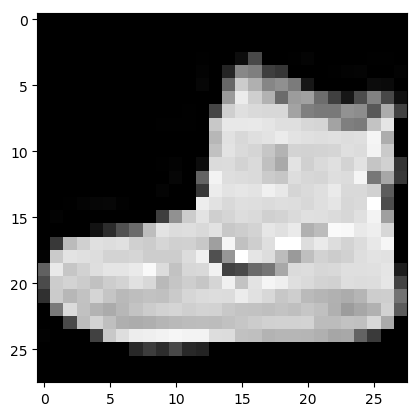

In [123]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.imshow(train_images[0], cmap="gray")

In [124]:
# one-hot encoding
from keras.utils import to_categorical
print("One-hot encoding - before")
print(train_labels)
print(test_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("One-hot encoding - after")
print(train_labels)
print(test_labels)

One-hot encoding - before
[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]
One-hot encoding - after
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [131]:
# 정규화
train_images = train_images.astype("float32")/255 
test_images = test_images.astype("float32")/255 

In [132]:
import tensorflow as tf

In [133]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [138]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, [None, 28*28])
ximg = tf.reshape(x, [-1, 28, 28, 1]) # 28*28*1 = channer(black/white)
y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([3, 3, 1, 32]))
L1 = tf.nn.conv2d(ximg, w1, strides=[1, 1, 1, 1], padding="SAME") 
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

w2 = tf.Variable(tf.random_normal([3, 3, 32, 64])) # 필터 32개를 사용하여서 입력값이 32개
L2 = tf.nn.conv2d(L1, w2, strides=[1, 1, 1, 1], padding="SAME") 
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") 
L2_flat = tf.reshape(L2, [-1, 7*7*64])

w3 = tf.get_variable("w3", shape=[7*7*64, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, w3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

W0808 17:18:42.398773 33432 deprecation.py:506] From <ipython-input-138-bbc0e657296d>:12: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [139]:
def next_batch(data, labels):
    '''
    랜덤한 샘플들과 레이블들을 리턴
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [140]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs): # 15
    avg_cost = 0
    total_batch = int(train_images.shape[0]/batch_size) # 60000 / 100
    for i in range(total_batch):
        train_images, train_labels = next_batch(train_images, train_labels)
        batchxs = train_images[i*batch_size:(i+1)*batch_size].reshape([-1, 28*28])
        batchys = train_labels[i*batch_size:(i+1)*batch_size]
        myfeed = {x: batchxs, y: batchys, keep_prob: 0.8}
        cv, _ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost += cv/total_batch
        
    print("cost", "{:.9f}".format(avg_cost))
c_pre = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("acc", sess.run(acc, feed_dict={x: test_images.reshape([-1, 28*28]), 
                                      y: test_labels,
                                      keep_prob: 1.0}))

cost 3.340043986
cost 1.256378563
cost 0.747825573
cost 0.539660925
cost 0.449949180
cost 0.384535358
cost 0.344509188
cost 0.318839907
cost 0.305215918
cost 0.303476396
cost 0.290711171
cost 0.282583298
cost 0.276009430
cost 0.277282873
cost 0.262456359
acc 0.8914


In [143]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, [None, 28*28])
ximg = tf.reshape(x, [-1, 28, 28, 1]) # 28*28*1 = channer(black/white)
y = tf.placeholder(tf.float32, [None, 10])


w1 = tf.Variable(tf.random_normal([3, 3, 1, 32]))
L1 = tf.nn.conv2d(ximg, w1, strides=[1, 1, 1, 1], padding="SAME") 
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

w2 = tf.Variable(tf.random_normal([3, 3, 32, 64])) # 필터 32개를 사용하여서 입력값이 32개
L2 = tf.nn.conv2d(L1, w2, strides=[1, 1, 1, 1], padding="SAME") 
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") 
L2_flat = tf.reshape(L2, [-1, 7*7*64])

w3 = tf.get_variable("w3", shape=[7*7*64, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, w3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [144]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs): # 15
    avg_cost = 0
    total_batch = int(train_images.shape[0]/batch_size) # 60000 / 100
    for i in range(total_batch):
        train_images, train_labels = next_batch(train_images, train_labels)
        batchxs = train_images[i*batch_size:(i+1)*batch_size].reshape([-1, 28*28])
        batchys = train_labels[i*batch_size:(i+1)*batch_size]
        myfeed = {x: batchxs, y: batchys}
        cv, _ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost += cv/total_batch
        
    print("epoch", epoch, "cost", "{:.9f}".format(avg_cost))
c_pre = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("acc", sess.run(acc, feed_dict={x: test_images.reshape([-1, 28*28]), 
                                      y: test_labels}))

epoch 0 cost 1.684169340
epoch 1 cost 0.639229262
epoch 2 cost 0.438606097
epoch 3 cost 0.345201531
epoch 4 cost 0.284161167
epoch 5 cost 0.246920544
epoch 6 cost 0.219367755
epoch 7 cost 0.200655138
epoch 8 cost 0.189834918
epoch 9 cost 0.178613938
epoch 10 cost 0.169073950
epoch 11 cost 0.155267596
epoch 12 cost 0.154099332
epoch 13 cost 0.140394990
epoch 14 cost 0.139048760
acc 0.8908
